In [3]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
#add lat and long to a list
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=153b8138702af9983a5fc1d8f5f5e51e


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1  #record counts up to 50 for groups of 50 cities starting at 1
set_count = 1   #set refers to batch sets of 50 cities

# Loop through all the cities in the list. (i- integer for the city #) makes tuple
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city   # "&q=" is a query parameter when looking

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | borba
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | lovozero
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | tota
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | matara
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | sydney
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | namatanai
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | mandalgovi
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | sento se
City not found. Skipping...
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | adrar


Processing Record 37 of Set 4 | sadri
Processing Record 38 of Set 4 | kuytun
Processing Record 39 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | victoria
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | kirakira
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | ngunguru
Processing Record 46 of Set 4 | strezhevoy
Processing Record 47 of Set 4 | pokhara
Processing Record 48 of Set 4 | xichang
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | warqla
City not found. Skipping...
Processing Record 1 of Set 5 | lyubashivka
Processing Record 2 of Set 5 | san rafael
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | dargaville
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | chokurdakh
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | kununurra
Processing Record 9 of Set 5 | silleda
Processing

Processing Record 25 of Set 8 | nantucket
Processing Record 26 of Set 8 | mae hong son
Processing Record 27 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 28 of Set 8 | charters towers
Processing Record 29 of Set 8 | acari
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | kristiinankaupunki
Processing Record 32 of Set 8 | broken hill
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | gorin
Processing Record 35 of Set 8 | mandera
Processing Record 36 of Set 8 | mindelo
Processing Record 37 of Set 8 | codrington
Processing Record 38 of Set 8 | lidorikion
City not found. Skipping...
Processing Record 39 of Set 8 | ginir
Processing Record 40 of Set 8 | karatuzskoye
Processing Record 41 of Set 8 | togitsu
Processing Record 42 of Set 8 | nemuro
Processing Record 43 of Set 8 | gushikawa
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | okha
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of 

Processing Record 15 of Set 12 | tazovskiy
Processing Record 16 of Set 12 | amahai
Processing Record 17 of Set 12 | rundu
Processing Record 18 of Set 12 | noumea
Processing Record 19 of Set 12 | marsa matruh
Processing Record 20 of Set 12 | joshimath
Processing Record 21 of Set 12 | ocean city
Processing Record 22 of Set 12 | ewa beach
Processing Record 23 of Set 12 | labuan
Processing Record 24 of Set 12 | kandete
Processing Record 25 of Set 12 | barentu
Processing Record 26 of Set 12 | hong gai
Processing Record 27 of Set 12 | kantang
Processing Record 28 of Set 12 | skalnyy
City not found. Skipping...
Processing Record 29 of Set 12 | kropotkin
Processing Record 30 of Set 12 | corinto
Processing Record 31 of Set 12 | castellaneta
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of Set 12 | marawi
Processing Record 34 of Set 12 | petrovskoye
Processing Record 35 of Set 12 | tanda
Processing Record 36 of Set 12 | grand centre
City not found. S

In [10]:
len(city_data)

562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2020-05-10 04:46:22,50.68,156.12,34.86,85,80,16.73
1,Borba,BR,2020-05-10 04:46:23,-4.39,-59.59,73.94,97,65,1.72
2,Lebu,CL,2020-05-10 04:46:23,-37.62,-73.65,55.94,82,90,11.43
3,Ribeira Grande,PT,2020-05-10 04:46:23,38.52,-28.70,59.23,69,20,22.66
4,New Norfolk,AU,2020-05-10 04:46:23,-42.78,147.06,53.01,70,73,5.01
5,Lovozero,RU,2020-05-10 04:46:23,68.00,35.01,33.12,94,98,10.27
6,Tota,CO,2020-05-10 04:46:23,5.56,-72.99,46.80,90,71,1.81
7,Namibe,AO,2020-05-10 04:46:23,-15.20,12.15,78.33,49,88,2.24
8,Matara,LK,2020-05-10 04:46:24,5.95,80.54,89.74,64,100,3.13
9,Busselton,AU,2020-05-10 04:43:58,-33.65,115.33,69.01,36,65,3.89


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/09/20'

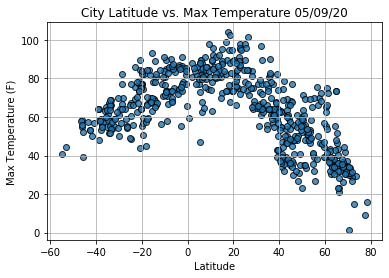

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

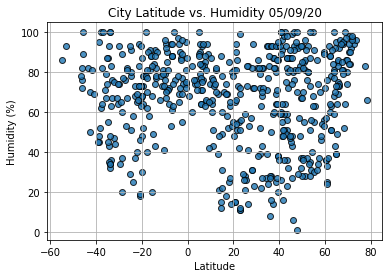

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

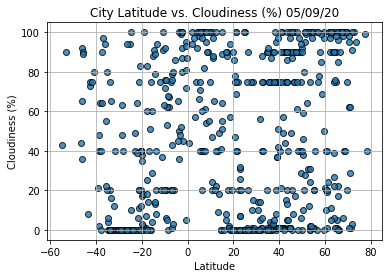

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

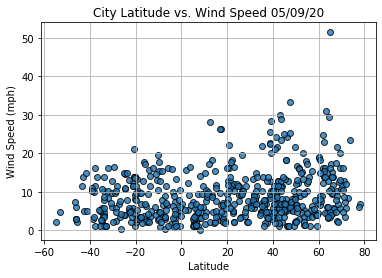

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
from scipy.stats import linregress
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

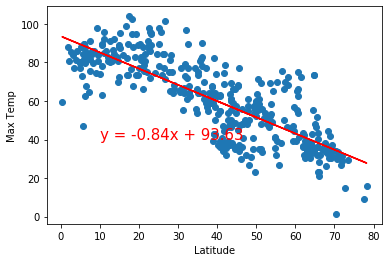

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp",(10,40))

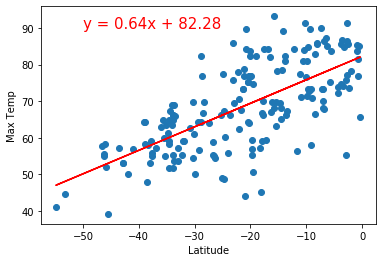

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

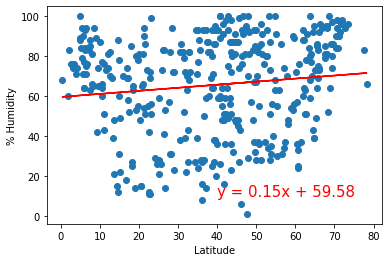

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

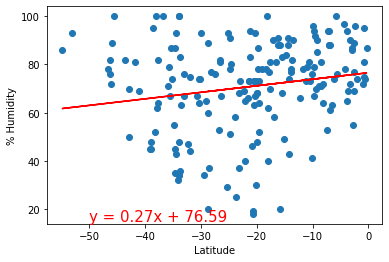

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

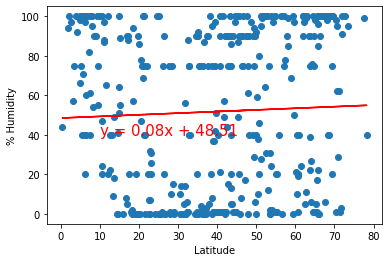

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Humidity',(10,40))

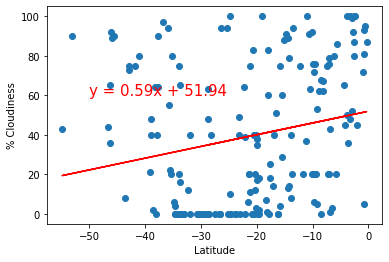

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

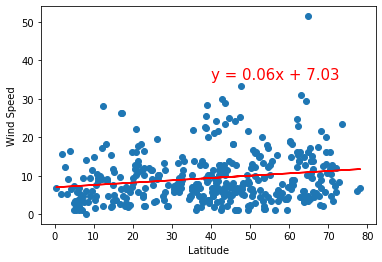

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

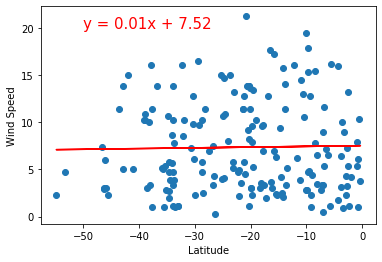

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))